In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")["Close"]

log_returns = np.log(data / data.shift(1)).dropna()

#percentage returns
returns = data.pct_change().dropna()

mu = returns.mean() * 252
sigma = returns.std() * np.sqrt(252)

# 252 because we are assuming that 252 the number of the trading days in year

print(f"Estimated mu = {mu.iloc[0]: .4f}, sigma = {sigma.iloc[0]: .4f}")

[*********************100%***********************]  1 of 1 completed

Estimated mu =  0.2990, sigma =  0.3357


***UP And Out Barrier Option***

Up-and-Out Call Price: 34.24527937187426


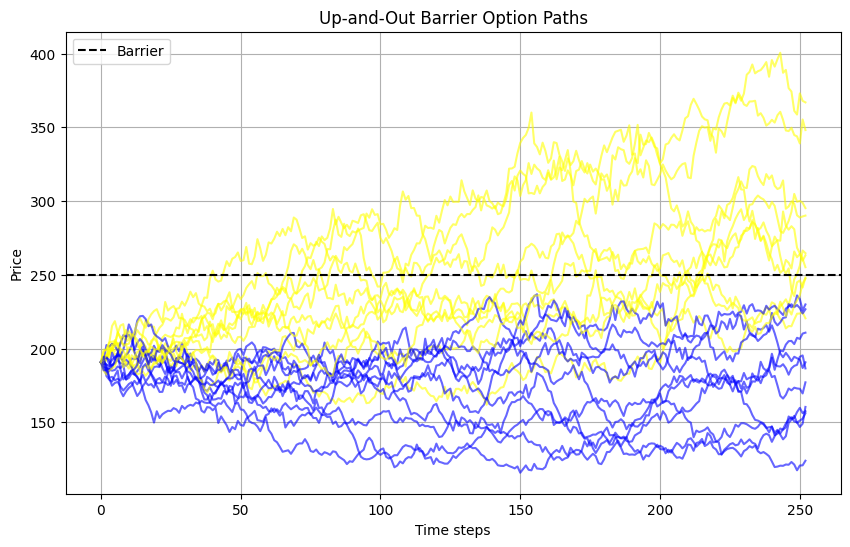

In [ ]:
S0 = data.iloc[-1]
T = 1.0  # we are simulationg for a total 1 year
n_steps = 252  # The no of the step that we are doing is 252 in a year ,your st will be 1/252
n_paths = 20  # we are simulating the 20 paths
dt = T / n_steps
K = 110                 # Strike price
B = 250                 # Barrier (Adjusted to be > S0 for meaningful simulation)
r = 0.05                # Risk-free rate (defined for self-contained cell)

# Extract scalar values from Series for efficiency
mu_scalar = mu.iloc[0]
sigma_scalar = sigma.iloc[0]

paths = np.zeros((n_steps+1, n_paths)) # data of the path gat stored in the col
paths[0] = S0

for t in range(1, n_steps+1):
  Z = np.random.normal(size = n_paths)
  paths[t] = paths[t-1] + (mu_scalar)*paths[t-1]*dt + sigma_scalar*paths[t-1]*np.sqrt(dt)*Z

# If any point of a path crosses the barrier → knocked out
barrier_hit = np.max(paths, axis = 0) >= B

ST = paths[-1]

payoffs = np.where(barrier_hit, 0, np.maximum(ST - K, 0))

# Discounted price
price = np.exp(-r * T) * np.mean(payoffs)

print("Up-and-Out Call Price:", price)


# Plot sample paths
plt.figure(figsize=(10,6))

for i in range(n_paths):  # Plot all paths for clarity or adjust to a subset
    if barrier_hit[i]:
        plt.plot(paths[:, i], color="yellow", alpha=0.6)   # knocked-out
    else:
        plt.plot(paths[:, i], color="blue", alpha=0.6)  # survived

plt.axhline(B, color="black", linestyle="--", label="Barrier")
plt.title("Up-and-Out Barrier Option Paths")
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

***Down And Out Barrier Option***

Down-and-Out Call Price: 83.84679159598377


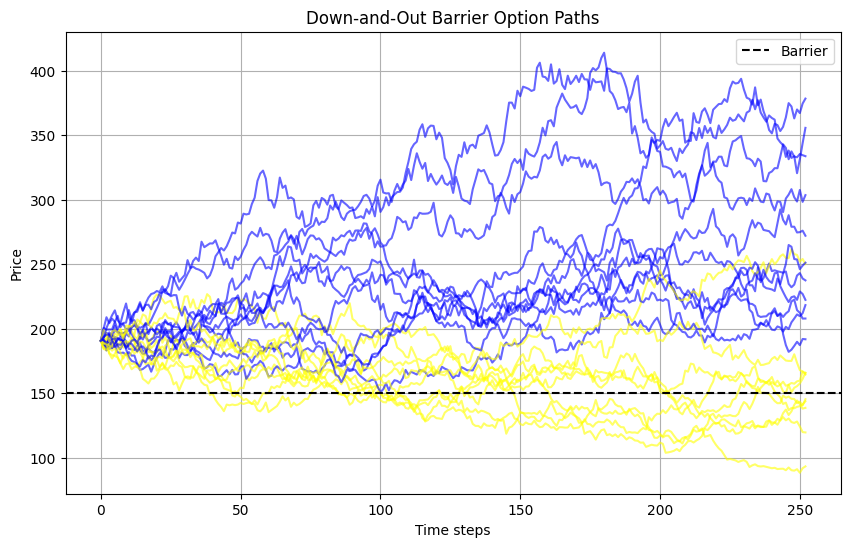

In [ ]:
S0 = data.iloc[-1]
T = 1.0  # we are simulationg for a total 1 year
n_steps = 252  # The no of the step that we are doing is 252 in a year ,your st will be 1/252
n_paths = 20  # we are simulating the 20 paths
dt = T / n_steps
K = 110                 # Strike price
B = 150                 # Barrier (Adjusted to be < S0 for meaningful simulation)
r = 0.05                # Risk-free rate (defined for self-contained cell)

# Extract scalar values from Series for efficiency
mu_scalar = mu.iloc[0]
sigma_scalar = sigma.iloc[0]

paths = np.zeros((n_steps+1, n_paths)) # data of the path gat stored in the col
paths[0] = S0

for t in range(1, n_steps+1):
  Z = np.random.normal(size = n_paths)
  paths[t] = paths[t-1] + (mu_scalar)*paths[t-1]*dt + sigma_scalar*paths[t-1]*np.sqrt(dt)*Z

# If any point of a path crosses the barrier → knocked out
barrier_hit = np.min(paths, axis = 0) <= B

ST = paths[-1]

payoffs = np.where(barrier_hit, 0, np.maximum(ST - K, 0))

# Discounted price
price = np.exp(-r * T) * np.mean(payoffs)

print("Down-and-Out Call Price:", price)


# Plot sample paths
plt.figure(figsize=(10,6))

for i in range(n_paths):  # Plot all paths for clarity or adjust to a subset
    if barrier_hit[i]:
        plt.plot(paths[:, i], color="Yellow", alpha=0.6)   # knocked-out
    else:
        plt.plot(paths[:, i], color="blue", alpha=0.6)  # survived

plt.axhline(B, color="black", linestyle="--", label="Barrier")
plt.title("Down-and-Out Barrier Option Paths")
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

***Up And In Barrier option***

Up-and-In Call Price: 77.265324750607


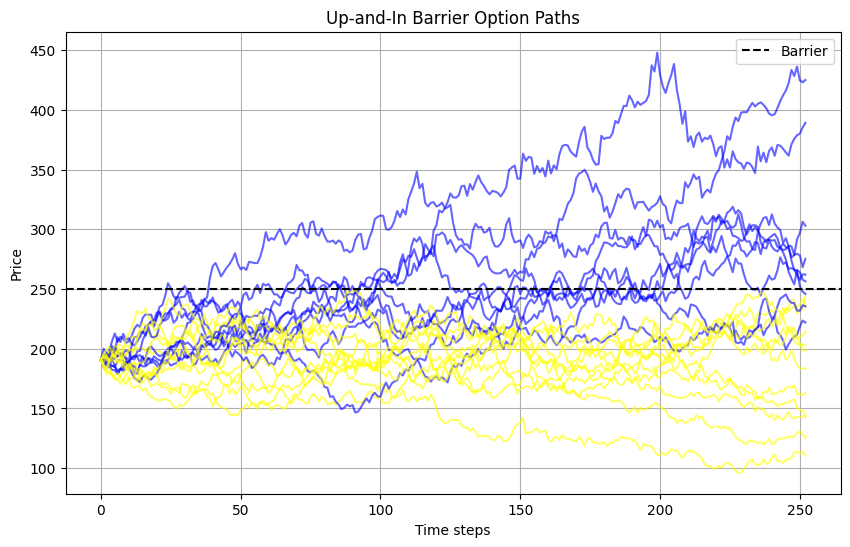

In [ ]:
S0 = data.iloc[-1]
T = 1.0  # we are simulationg for a total 1 year
n_steps = 252  # The no of the step that we are doing is 252 in a year ,your st will be 1/252
n_paths = 20  # we are simulating the 20 paths
dt = T / n_steps
K = 110                 # Strike price
B = 250                # Barrier (Adjusted to be > S0 for meaningful simulation)
r = 0.05                # Risk-free rate (defined for self-contained cell)

# Extract scalar values from Series for efficiency
mu_scalar = mu.iloc[0]
sigma_scalar = sigma.iloc[0]

paths = np.zeros((n_steps+1, n_paths)) # data of the path gat stored in the col
paths[0] = S0

for t in range(1, n_steps+1):
  Z = np.random.normal(size = n_paths)
  paths[t] = paths[t-1] + (mu_scalar)*paths[t-1]*dt + sigma_scalar*paths[t-1]*np.sqrt(dt)*Z

# If any point of a path crosses the barrier -> knocked in
barrier_hit = np.max(paths, axis = 0) >= B

ST = paths[-1]

payoffs = np.where(barrier_hit, np.maximum(ST - K, 0), 0)

# Discounted price
price = np.exp(-r * T) * np.mean(payoffs)

print("Up-and-In Call Price:", price)


# Plot sample paths
plt.figure(figsize=(10,6))

for i in range(n_paths):
    if barrier_hit[i]:
        plt.plot(paths[:, i], color="blue", alpha=0.6)   # knocked-in (active)
    else:
        plt.plot(paths[:, i], color="Yellow", alpha=0.6)  # not knocked-in (worthless)

plt.axhline(B, color="black", linestyle="--", label="Barrier")
plt.title("Up-and-In Barrier Option Paths")
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

***Down And In arrier option***

Down-and-In Call Price: 16.480060606242024


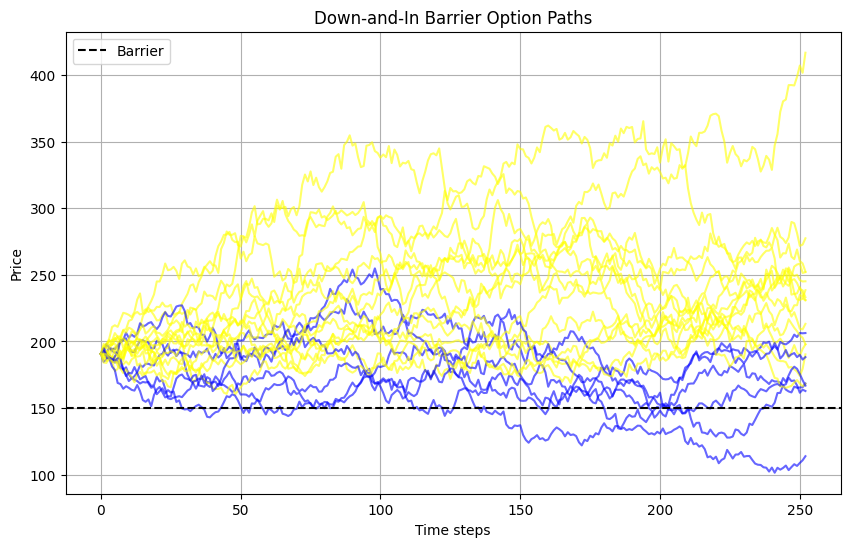

In [ ]:
S0 = data.iloc[-1]
T = 1.0  # we are simulationg for a total 1 year
n_steps = 252  # The no of the step that we are doing is 252 in a year ,your st will be 1/252
n_paths = 20  # we are simulating the 20 paths
dt = T / n_steps
K = 110                 # Strike price
B = 150                 # Barrier (Adjusted to be < S0 for meaningful simulation)
r = 0.05                # Risk-free rate (defined for self-contained cell)

# Extract scalar values from Series for efficiency
mu_scalar = mu.iloc[0]
sigma_scalar = sigma.iloc[0]

paths = np.zeros((n_steps+1, n_paths)) # data of the path gat stored in the col
paths[0] = S0

for t in range(1, n_steps+1):
  Z = np.random.normal(size = n_paths)
  paths[t] = paths[t-1] + (mu_scalar)*paths[t-1]*dt + sigma_scalar*paths[t-1]*np.sqrt(dt)*Z

# If any point of a path crosses the barrier -> knocked in
barrier_hit = np.min(paths, axis = 0) <= B

ST = paths[-1]

payoffs = np.where(barrier_hit, np.maximum(ST - K, 0), 0)

# Discounted price
price = np.exp(-r * T) * np.mean(payoffs)

print("Down-and-In Call Price:", price)


# Plot sample paths
plt.figure(figsize=(10,6))

for i in range(n_paths):
    if barrier_hit[i]:
        plt.plot(paths[:, i], color="blue", alpha=0.6)   # knocked-in (active)
    else:
        plt.plot(paths[:, i], color="yellow", alpha=0.6)  # not knocked-in (worthless)

plt.axhline(B, color="black", linestyle="--", label="Barrier")
plt.title("Down-and-In Barrier Option Paths")
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()